In [ ]:
# Desafio Final ML - Academia RedFit
# Arthur Trindade

In [2]:
# 1. Importação e Extração

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Extração: Carregar o CSV
df = pd.read_csv("/content/academia_redfit.csv")

In [3]:
# 2. Transformação e Análise

print("Iniciando Transformação dos Dados")


for col in ['tempo_medio_exercicio', 'minutos_totais_semana', 'preco_plano']:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)


for col in ['sexo', 'tipo_atividade', 'estado']:
    df[col] = df[col].str.title()


df['data_matricula'] = pd.to_datetime(df['data_matricula'], errors='coerce')


df['evolucao_PGC'] = df['primeiro_PGC'] - df['ultimo_PGC']


def definir_nivel(row):
    if row['estado'] == 'Sedentária':
        return 'Sedentário'
    elif row['frequencia_semanal_treino'] >= 5 and row['ultimo_PGC'] < 15:
        return 'Atleta'
    else:
        return 'Ativo'
df['nivel_atividade'] = df.apply(definir_nivel, axis=1)

print("Transformação concluída. Novas colunas criadas.")
print("Observação: O cálculo do IMC não foi possível por falta das colunas de peso e altura.")


Iniciando Transformação dos Dados
Transformação concluída. Novas colunas criadas.
Observação: O cálculo do IMC não foi possível por falta das colunas de peso e altura.


/tmp/ipython-input-363587057.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [4]:
# 3. CSV Tratado para análise

df.to_csv("academia_redfit_tratado.csv", index=False)
print("\nArquivo 'academia_redfit_tratado.csv' salvo com sucesso.")


Arquivo 'academia_redfit_tratado.csv' salvo com sucesso.



Gerando visualizações


/tmp/ipython-input-692186331.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nivel_atividade', data=df, order=['Sedentário', 'Ativo', 'Atleta'], palette='rocket')


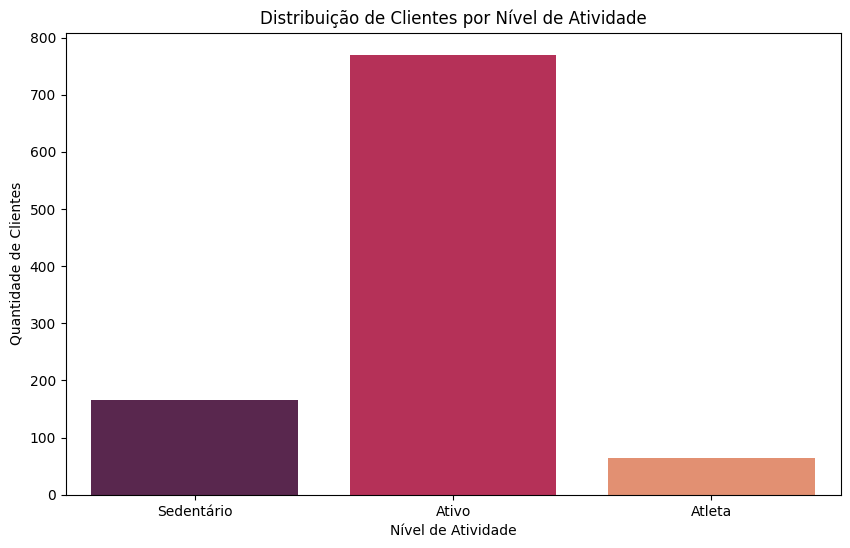

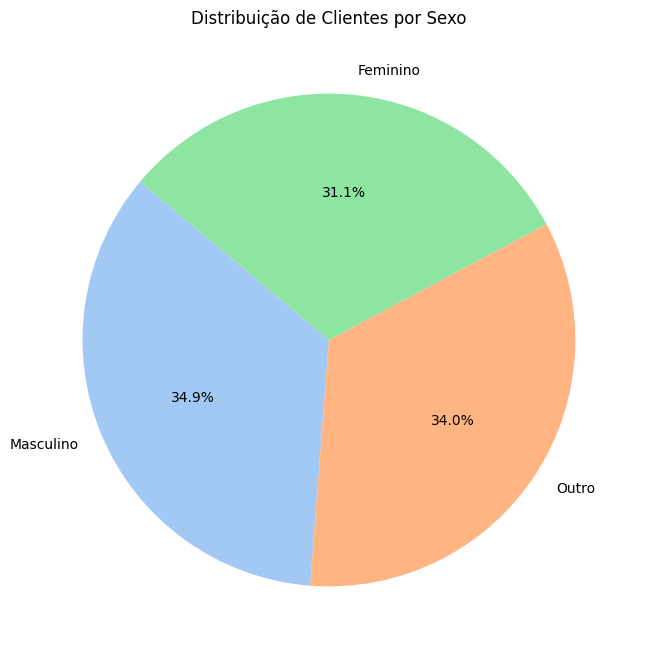

In [5]:
# 4. Visualização com Matplotlib

print("\nGerando visualizações")


plt.figure(figsize=(10, 6))
sns.countplot(x='nivel_atividade', data=df, order=['Sedentário', 'Ativo', 'Atleta'], palette='rocket')
plt.title('Distribuição de Clientes por Nível de Atividade')
plt.xlabel('Nível de Atividade')
plt.ylabel('Quantidade de Clientes')
plt.show()


plt.figure(figsize=(8, 8))
sexo_counts = df['sexo'].value_counts()
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribuição de Clientes por Sexo')
plt.ylabel('')
plt.show()


In [6]:
# 5. Modelos de classificação e sepação em x e y
print("\Iniciando o Processo de M.L.")


features_to_drop = ['data_matricula', 'estado', 'primeiro_PGC', 'ultimo_PGC', 'nivel_atividade']
X = df.drop(columns=features_to_drop)
y = df['nivel_atividade']


label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)


numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

\Iniciando o Processo de M.L.


<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
/tmp/ipython-input-2693819234.py:2: SyntaxWarning: invalid escape sequence '\I'
  print("\Iniciando o Processo de M.L.")


In [7]:
# 6. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])


In [8]:
# 7. Treinar e avaliar modelos
model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"\nAcurácia do modelo Random Forest para classificar clientes: {accuracy*100:.2f}%")
print("\nProcesso de Machine Learning Concluído")


Acurácia do modelo Random Forest para classificar clientes: 94.00%

Processo de Machine Learning Concluído


In [9]:
# 8. Baixar o melhor modelo

import joblib

best_model = model_rf


joblib.dump(best_model, "redfit_model.pkl")


['redfit_model.pkl']